In [2]:
import os

import numpy as np
import math
import uproot as uproot
import pickle
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib import gridspec
import dunestyle.matplotlib as dunestyle

import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import median_abs_deviation
from scipy.interpolate import CubicSpline
from scipy.optimize import curve_fit
import scipy.linalg as la
import scipy.optimize as opt
from scipy.optimize import Bounds, LinearConstraint
from scipy.stats import chisquare

DUNE plot style enabled


In [4]:
with open('../data/h5lists/nudf_h5_list.txt', 'r') as f:
    file_paths = [line.strip() for line in f]

In [5]:
nudf = pd.DataFrame()

# Iterate through the list and read/concatenate the DataFrames
for file_path in file_paths:
    # Adjust the 'key' to the dataset name you want to read
    df = pd.read_hdf(file_path, key='nudf')  # Replace 'nudf' if needed
    nudf = pd.concat([nudf, df], ignore_index=True)

In [6]:
nuinteg_labels = ["non-FV", "NC", "Signal", "Non-Sig. CCCOH", "QE", "2p2h", "RES", "DIS", "INEL", "Others"]

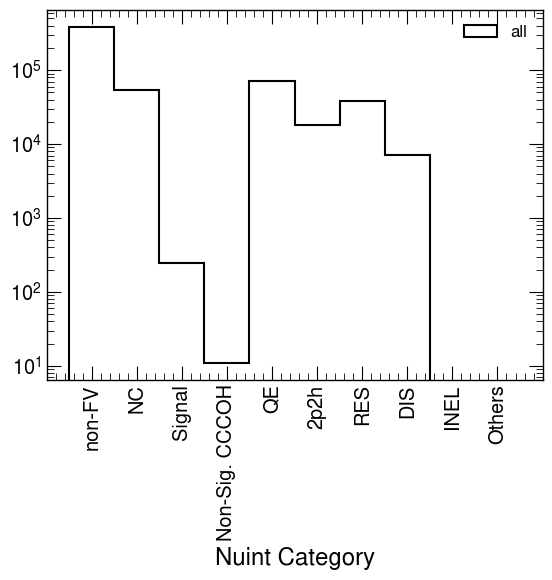

In [7]:
var = nudf.nuint_categ
plt.hist(var, bins=np.linspace(-1.5, 8.5, 11), histtype="step", label=["all"])
plt.xlabel("Nuint Category")
plt.yscale('log')
plt.legend()
plt.xticks(ticks=np.arange(-1, 9), labels=nuinteg_labels, rotation=90)
plt.show()

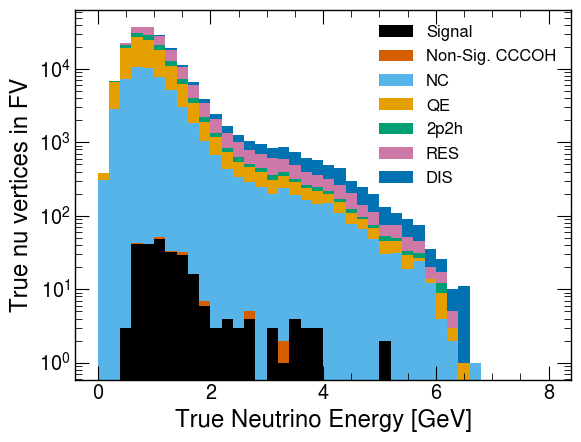

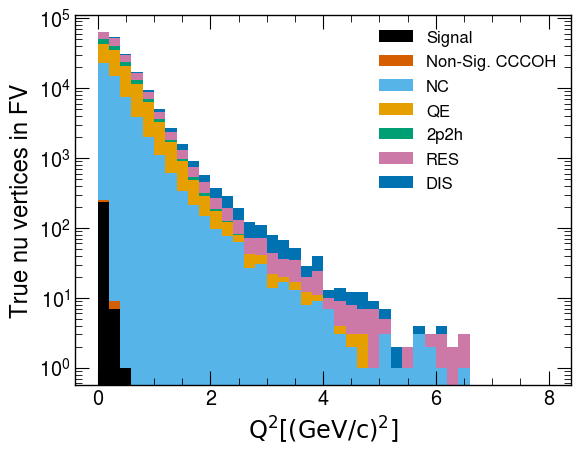

In [9]:
# selected true neutrino events interaction breakdown
mode_list = [1, 2, 0, 3, 4, 5, 6]
mode_labels = ["Signal", "Non-Sig. CCCOH", "NC", "QE", "2p2h", "RES", "DIS"]
var = [nudf[nudf.nuint_categ == mode].nu.E for mode in mode_list]
plt.hist(var, bins=np.linspace(0,8,41), stacked=True, label=mode_labels)
plt.xlabel("True Neutrino Energy [GeV]")
plt.ylabel("True nu vertices in FV")
plt.yscale('log')
plt.legend()
plt.show()

var = [nudf[nudf.nuint_categ == mode].nu.Q2 for mode in mode_list]
plt.hist(var, bins=np.linspace(0,8,41), stacked=True, label=mode_labels)
plt.xlabel(r"$\mathrm{Q^2 [(GeV/c)^2] }$")
plt.ylabel("True nu vertices in FV")
plt.yscale('log')
plt.legend()
plt.show()



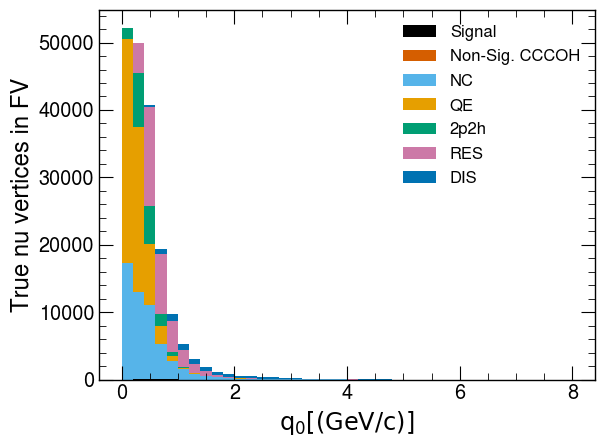

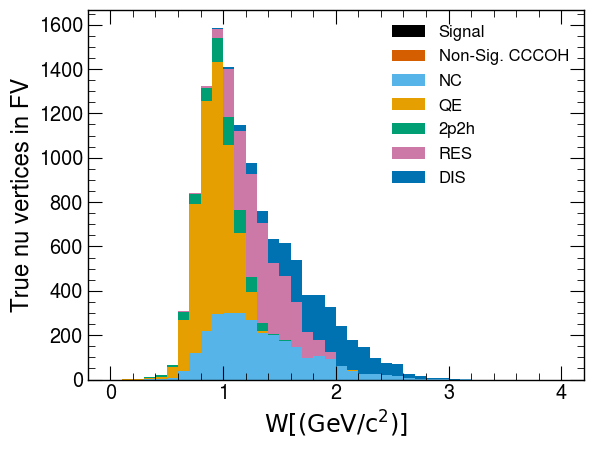

In [11]:
nudf_q2g1 = nudf[nudf.nu.Q2 > 1.]
var = [nudf[nudf.nuint_categ == mode].nu.q0_lab for mode in mode_list]
plt.hist(var, bins=np.linspace(0,8,41), stacked=True, label=mode_labels)
plt.xlabel(r"$\mathrm{q_0 [(GeV/c)] }$")
plt.ylabel("True nu vertices in FV")
plt.legend()
plt.show()

var = [nudf_q2g1[nudf_q2g1.nuint_categ == mode].nu.w for mode in mode_list]
plt.hist(var, bins=np.linspace(0,4,41), stacked=True, label=mode_labels)
plt.xlabel(r"$\mathrm{W [(GeV/c^2)] }$")
plt.ylabel("True nu vertices in FV")
plt.legend()
plt.show()